# Task 4.10 Part 1

## Script Contents:

1. Import the dataframe and library
2. Consider security implications
3. Create a region column
4. Create an exclusion flag for low activity customers
5. Create profile variables
6. Create visualizations showing the distribution of profiles
7. Aggregate variables
8. Compare profiles using crosstabs
9. Additional visualizations

## Question 1: Import the Dataframe & Library

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create a path
path = r'C:\Users\dyl41\Documents\11-14-2022 Instacart Basket Analysis'

In [3]:
#Import Project Dataset
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final3.pkl'))

## Question 2: Consider Security Implications

The data in this dataset contains PII. In a non-educational setting, senior analysts would be consulted to determine the best course of action. For this project, the PII will remain and a notation of this will be included in the final report.

## Question 3: Create a Region Column

In [4]:
#Check the dataframe
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#Create a list to define the regions using a for loop
Region = []

for value in df_final['state']:
 if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    Region.append('Northeast')
 elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    Region.append('Midwest')
 elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    Region.append('South')
 else:
    Region.append('West')

In [6]:
#Combine the for loop with the dataframe and create the new column
df_final['region'] = Region

In [7]:
#Check the dataframe
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [8]:
#Check the value counts
df_final['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [9]:
#See all columns
pd.set_option('display.max_columns', None)

In [10]:
#Check the dataframe
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


### Crosscheck Regions Against Spending Habits

In [11]:
#Crosscheck the new variable 'region' with 'spending flag'
pd.crosstab(df_final['region'], df_final['spending_flag'])

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## Question 4: Create an Exclusion Flag for Low Activity Customers

In [12]:
#Create the function
df_final.loc[df_final['max_order'] >= 5, 'activity_flag'] = 'normal'
df_final.loc[df_final['max_order'] < 5 , 'activity_flag'] = 'low'

normal    30964564
low        1440295
Name: activity_flag, dtype: int64

In [14]:
#Create a sample dataframe from the activity data - low activity
df_low = df_final[df_final['activity_flag']=='low']

In [15]:
#Check the sample - low activity
df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region,activity_flag
1510,520620,120,1,3,11,NaN,True,196,2,0,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1511,3273029,120,3,2,8,19.0,False,196,2,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1512,520620,120,1,3,11,NaN,True,46149,1,0,Zero Calorie Cola,77,7,13.4,both,Mid-range product,Least busy,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1513,3273029,120,3,2,8,19.0,False,46149,1,1,Zero Calorie Cola,77,7,13.4,both,Mid-range product,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1514,520620,120,1,3,11,NaN,True,26348,3,0,Mixed Fruit Fruit Snacks,50,19,3.1,both,Low-range product,Least busy,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low


In [16]:
#Check the shape - low activity
df_low.shape

(1440295, 35)

In [25]:
#Export the df_low dataset
df_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [17]:
#Create a sample dataframe from the activity data - normal activity
df_normal = df_final[df_final['activity_flag']=='normal']

In [18]:
#Check the sample - normal activity
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [19]:
#Check the shape - normal activity
df_normal.shape

(30964564, 35)

## Question 5: Create Profiling Variables

### Age Variable

In [38]:
#Check the dataframe
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [55]:
#Create three variables - young adult, middle-aged adult, senior
df_normal.loc[(df_normal['age']>=18)&(df_normal['age']<=35),'age_grouping']='Young Adult'

C:\Users\dyl41\AppData\Local\Temp\ipykernel_11768\3103548923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal.loc[(df_normal['age']>=18)&(df_normal['age']<=35),'age_grouping']='Young Adult'


In [56]:
df_normal.loc[(df_normal['age']>=36)&(df_normal['age']<=65),'age_grouping']='Middle-Aged Adult'

In [57]:
df_normal.loc[(df_normal['age']>=66),'age_grouping']='Senior'

In [58]:
#Check the value counts
df_normal['age_grouping'].value_counts(dropna = False)

Middle-Aged Adult    14494925
Young Adult           8738805
Senior                7730834
Name: age_grouping, dtype: int64

In [59]:
#Check the shape
df_normal.shape

(30964564, 36)

In [60]:
#Check the dataframe
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region,activity_flag,age_grouping
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult


### Income Variable

In [75]:
df_normal.loc[(df_normal['income']>=25903)&(df_normal['income']<=50000), 'income_grouping'] = 'Low Income'

In [76]:
df_normal.loc[(df_normal['income']>=50001)&(df_normal['income'] <=100000), 'income_grouping'] = 'Middle Income'

In [77]:
df_normal.loc[df_normal['income']>=100001, 'income_grouping'] = 'High Income'

In [78]:
#Check the value counts
df_normal['income_grouping'].value_counts(dropna = False)

High Income      14207028
Middle Income    13394982
Low Income        3362554
Name: income_grouping, dtype: int64

In [79]:
#Check the shape
df_normal.shape

(30964564, 37)

In [80]:
#Check the dataframe
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income,region,activity_flag,age_grouping,income_grouping
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income


### Department ID Variable

In [114]:
#Use a for loop to create a variable to look at the pet food aisle
result=[]

for value in df_normal['department_id']:
    if value == 8:
        result.append('Pet Supply Shopper')
    else:
        result.append('Non-Pet Supply Shopper')

In [115]:
#Merge with the dataset
df_normal['pet_supply_shopper'] = result

In [116]:
#Check the new variable
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_grouping,income_grouping,pet_owner,family_status,pet_supply_shopper
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,Non-Pet Owner,family with children,Non-Pet Supply Shopper
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,Non-Pet Owner,family with children,Non-Pet Supply Shopper
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,Non-Pet Owner,family with children,Non-Pet Supply Shopper
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,Non-Pet Owner,family with children,Non-Pet Supply Shopper
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,Non-Pet Owner,family with children,Non-Pet Supply Shopper


In [126]:
#Check the value counts
df_normal['pet_supply_shopper'].value_counts(dropna = False)

Non-Pet Supply Shopper    30871504
Pet Supply Shopper           93060
Name: pet_supply_shopper, dtype: int64

In [121]:
del df_normal['pet_owner']

The pet_owner column was renamed to pet_supply_shopper for clarity. The same code was ran, but the old column header was deleted

In [93]:
#Caught an error with column name. Renamed.
df_normal = df_normal.rename(columns={'martial_status': 'marital_status'})

### Family Status Variable

In [95]:
#Check marital_status to see all conditions
df_normal['marital_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [99]:
#Create a function to determine whether people with dependents are single or married. Also determine people without children.
df_normal.loc[(df_normal['no_of_dependents']>=1)&(df_normal['marital_status'] == 'married'),'family_status']='family with children'
df_normal.loc[(df_normal['no_of_dependents']>=1)&(df_normal['marital_status'] == 'single'),'family_status']='single parent with children'
df_normal.loc[(df_normal['no_of_dependents']>=1)&(df_normal['marital_status'] == 'divorced/widowed'),'family_status']='single parent with children'
df_normal.loc[(df_normal['no_of_dependents']>=1)&(df_normal['marital_status'] == 'living with parents and siblings'),'family_status']='single parent with children'
df_normal.loc[(df_normal['no_of_dependents']==0),'family_status']='single or married without children'

In [100]:
#Check the value counts
df_normal['family_status'].value_counts(dropna = False)

family with children                  21743711
single or married without children     7739681
single parent with children            1481172
Name: family_status, dtype: int64

In [129]:
#Check the dataframe
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_grouping,income_grouping,family_status,pet_supply_shopper
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper


In [120]:
#Check shape
df_normal['family_status'].shape

(30964564,)

## Question 6: Create Visualizations Showing Distribution of Profiles

### Profile Visualization: Age

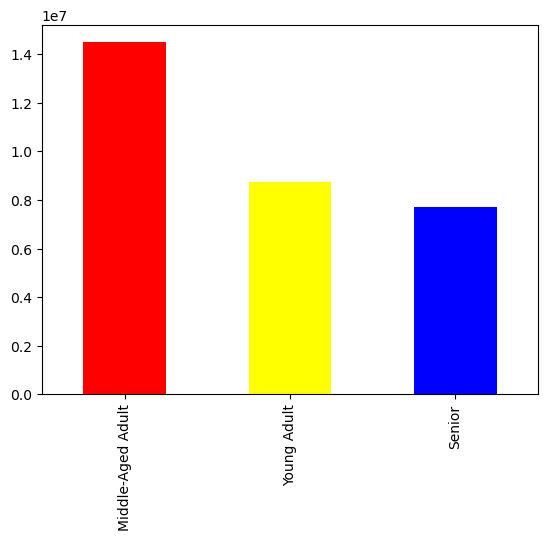

In [104]:
#Create a bar chart showing the age groupings
age_bar = df_normal['age_grouping'].value_counts().plot.bar(color=['red','yellow','blue'])

In [106]:
#Save the bar chart
age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_bar.png'))

### Profile Visualization: Income

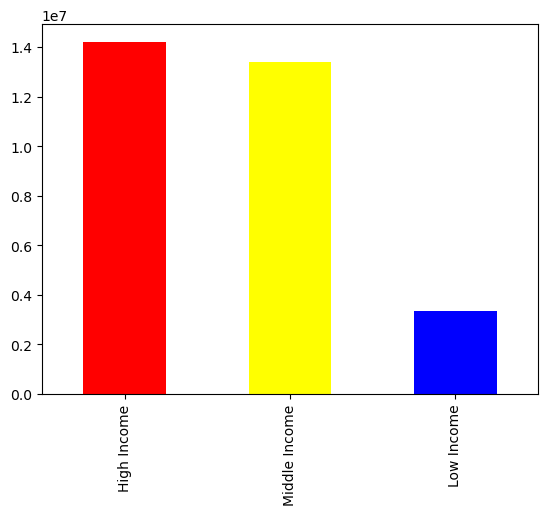

In [109]:
#Create a bar chart showing the income groupings
income_bar = df_normal['income_grouping'].value_counts().plot.bar(color=['red', 'yellow', 'blue'])

In [110]:
#Save the bar chart
income_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_bar.png'))

### Profile Visualization: Pet Supply Shoppers

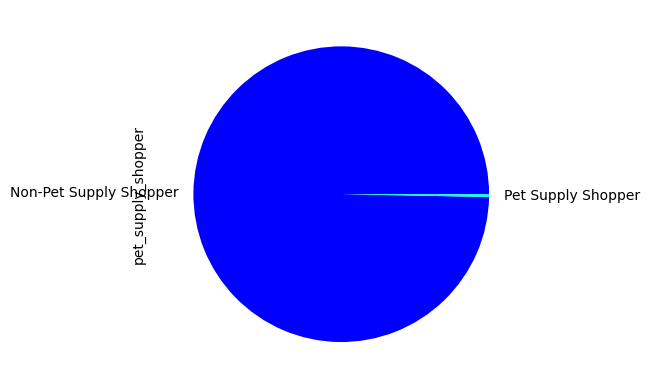

In [125]:
#Create a pie chart showing the pet supply shoppers
pet_pie = df_normal['pet_supply_shopper'].value_counts().plot.pie(labels=['Non-Pet Supply Shopper', 'Pet Supply Shopper'], colors=['blue','cyan'])

In [128]:
#Save the pie chart
pet_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pet_pie.png'))

### Profile Visualization: Family Status

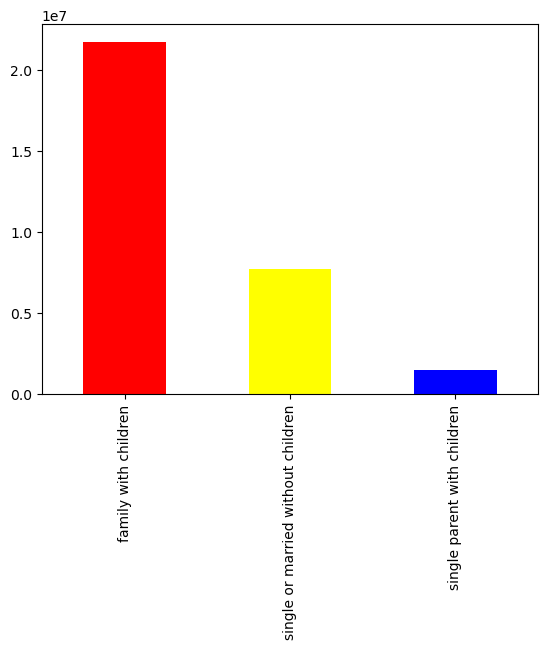

In [131]:
#Create a bar chart showing family statuses
family_status_bar = df_normal['family_status'].value_counts().plot.bar(color=['red', 'yellow', 'blue'])

In [132]:
#Save the bar chart
family_status_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_bar.png'))

## Question 7: Aggregate Variables

### Usage Frequency: Age

In [134]:
#Mean, Min, and Max for age groupings based on days since prior order
df_normal.groupby('age_grouping').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                    mean  min   max
age_grouping                                       
Middle-Aged Adult              10.806894  0.0  30.0
Senior                         10.795536  0.0  30.0
Young Adult                    10.829007  0.0  30.0

### Expenditure: Age

In [135]:
#Mean, Min, and Max for age groupings based on spending habits
df_normal.groupby('age_grouping').agg({'prices':['mean', 'min','max']})

prices           
                       mean  min   max
age_grouping                          
Middle-Aged Adult  7.792414  1.0  25.0
Senior             7.794342  1.0  25.0
Young Adult        7.784246  1.0  25.0

### Usage Frequency: Income

In [136]:
#Mean, Min, and Max for income groupings based on days since prior order
df_normal.groupby('income_grouping').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                  mean  min   max
income_grouping                                  
High Income                  10.769663  0.0  30.0
Low Income                   11.175808  0.0  30.0
Middle Income                10.762110  0.0  30.0

### Expenditure: Income

In [137]:
#Mean, Min, and Max for income groupings based on spending habits
df_normal.groupby('income_grouping').agg({'prices':['mean', 'min','max']})

prices           
                     mean  min   max
income_grouping                     
High Income      7.953438  1.0  25.0
Low Income       6.707347  1.0  25.0
Middle Income    7.889856  1.0  25.0

### Usage Frequency: Pet Supply Shoppers

In [138]:
#Mean, Min, and Max for pet supply shoppers based on days since prior order
df_normal.groupby('pet_supply_shopper').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                         mean  min   max
pet_supply_shopper                                      
Non-Pet Supply Shopper              10.807946  0.0  30.0
Pet Supply Shopper                  11.593531  0.0  30.0

### Expenditure: Pet Supply Shoppers

In [139]:
#Mean, Min, and Max for pet supply shoppers based on spending habits
df_normal.groupby('pet_supply_shopper').agg({'prices':['mean', 'min','max']})

prices           
                            mean  min   max
pet_supply_shopper                         
Non-Pet Supply Shopper  7.790298  1.0  25.0
Pet Supply Shopper      7.887489  1.0  15.0

### Usage Frequency: Family Status

In [140]:
#Mean, Min, and Max for family status groupings based on days since prior order
df_normal.groupby('family_status').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                                     mean  min   max
family_status                                                       
family with children                            10.820875  0.0  30.0
single or married without children              10.791951  0.0  30.0
single parent with children                     10.750995  0.0  30.0

### Expenditure: Family Status

In [141]:
#Mean, Min, and Max for family status groupings based on spending habits
df_normal.groupby('family_status').agg({'prices':['mean', 'min','max']})

prices           
                                        mean  min   max
family_status                                          
family with children                7.790278  1.0  25.0
single or married without children  7.789550  1.0  25.0
single parent with children         7.800604  1.0  25.0

## Question 8: Compare Profiles Using Crosstabs

### Age Grouping/Region

In [157]:
#Compare age groupings across regions
crosstab_age=pd.crosstab(df_normal['region'],df_normal['age_grouping'],dropna=False)

In [158]:
#Check the crosstab
crosstab_age

age_grouping,Middle-Aged Adult,Senior,Young Adult
region,,,
Midwest,3443496,1799606,2018411
Northeast,2518721,1394490,1551474
South,4811694,2549034,2950411
West,3721014,1987704,2218509


### Income Grouping/Region

In [164]:
#Compare income groupings across regions
crosstab_income=pd.crosstab(df_normal['region'],df_normal['income_grouping'],dropna=False)

In [166]:
#Check the crosstab
crosstab_income

income_grouping,High Income,Low Income,Middle Income
region,,,
Midwest,3400093,783764,3077656
Northeast,2516484,587137,2361064
South,4663571,1142572,4504996
West,3626880,849081,3451266


### Pet Supply Shoppers/Region

In [167]:
#Compare pet supply shoppers across regions
crosstab_pets=pd.crosstab(df_normal['region'],df_normal['pet_supply_shopper'],dropna=False)

In [168]:
#Check the crosstab
crosstab_pets

pet_supply_shopper,Non-Pet Supply Shopper,Pet Supply Shopper
region,,
Midwest,7240155,21358
Northeast,5446951,17734
South,10281230,29909
West,7903168,24059


### Family Status/Region

In [169]:
#Compare family status groupings across regions
crosstab_family=pd.crosstab(df_normal['region'],df_normal['family_status'],dropna=False)

In [170]:
#Check the crosstab
crosstab_family

family_status,family with children,single or married without children,single parent with children
region,,,
Midwest,5087262,1822816,351435
Northeast,3853773,1354482,256430
South,7223749,2581933,505457
West,5578927,1980450,367850


In [172]:
df_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_grouping,income_grouping,family_status,pet_supply_shopper
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper


## Export Final Dataframe

In [180]:
df_normal.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_instacart.pkl'))

## Additional Visualizations

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create a path
path = r'C:\Users\dyl41\Documents\11-14-2022 Instacart Basket Analysis'

In [4]:
#Import Project Dataset
df_final2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_instacart.pkl'))

In [8]:
#Compare age groupings across regions
crosstab_age=pd.crosstab(df_final2['region'],df_final2['age_grouping'],dropna=False)

In [13]:
#Check the crosstab
crosstab_age

age_grouping,Middle-Aged Adult,Senior,Young Adult
region,,,
Midwest,3443496,1799606,2018411
Northeast,2518721,1394490,1551474
South,4811694,2549034,2950411
West,3721014,1987704,2218509


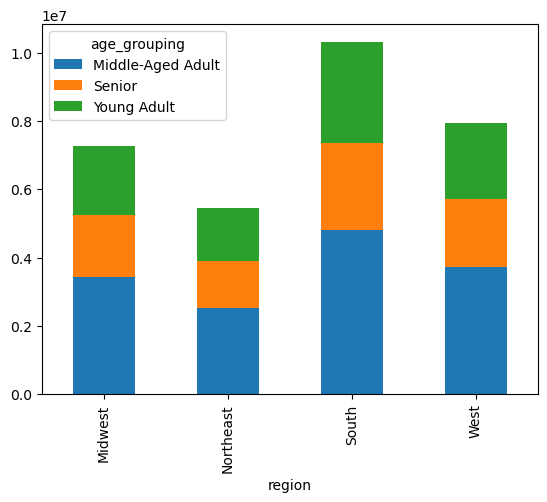

In [14]:
#Create the bar chart
bar2 = crosstab_age.plot(kind= 'bar', stacked = True)

In [15]:
#Save the bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_age.png'))

In [21]:
#Import departments_wrangled dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [23]:
#Change column name
df_dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [24]:
#Check dataframe
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [25]:
#Create a data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [31]:
#View all columns
pd.set_option('display.max_columns', None)

In [36]:
#Reimport dataset
df_final3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_instacart.pkl'))

In [37]:
#Check the dataset
df_final3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_grouping,income_grouping,family_status,pet_supply_shopper
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper


In [40]:
#Create department column with names from department_id
df_final3['department'] = df_final3['department_id'].map(data_dict)

In [41]:
df_final3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_grouping,income_grouping,family_status,pet_supply_shopper,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages


In [42]:
#Create crosstab of departments and age groupings
region_dept=pd.crosstab(df_final3['department'], df_final3['age_grouping'])

In [43]:
#Check the crosstab
region_dept.head()

age_grouping,Middle-Aged Adult,Senior,Young Adult
department,,,
alcohol,67551,34691,42385
babies,196765,100162,113465
bakery,525339,278458,317031
beverages,1208097,646414,717390
breakfast,313942,165491,191417


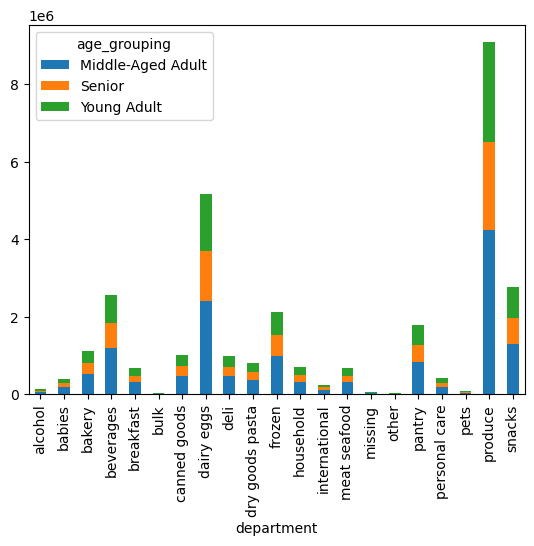

In [44]:
#Create bar chart
bar3 = region_dept.plot(kind= 'bar', stacked = True)

In [45]:
#Save bar chart
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_department.png'))

In [46]:
#Create crosstab of departments and region
region_dept2=pd.crosstab(df_final3['department'], df_final3['region'])

In [47]:
#Check the crosstab
region_dept2.head()

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619


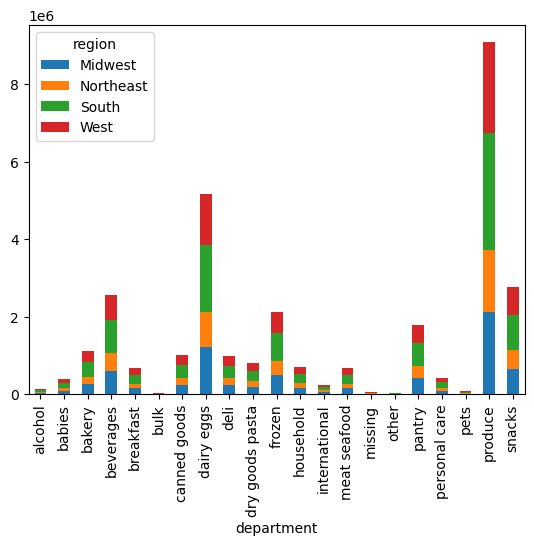

In [48]:
#Create a bar chart
bar4 = region_dept2.plot(kind='bar', stacked=True)

In [49]:
#Save the bar chart
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_department.png'))

In [50]:
#Create crosstab of region and order frequency
crosstab_region_frequency=pd.crosstab(df_final3['order_frequency_flag'], df_final3['region'])

In [51]:
#Check the crosstab
crosstab_region_frequency.head()

region,Midwest,Northeast,South,West
order_frequency_flag,,,,
Frequent customer,4935393,3740982,7073789,5454312
Non-frequent customer,690030,496911,968006,740028
Regular customer,1636090,1226792,2269344,1732887


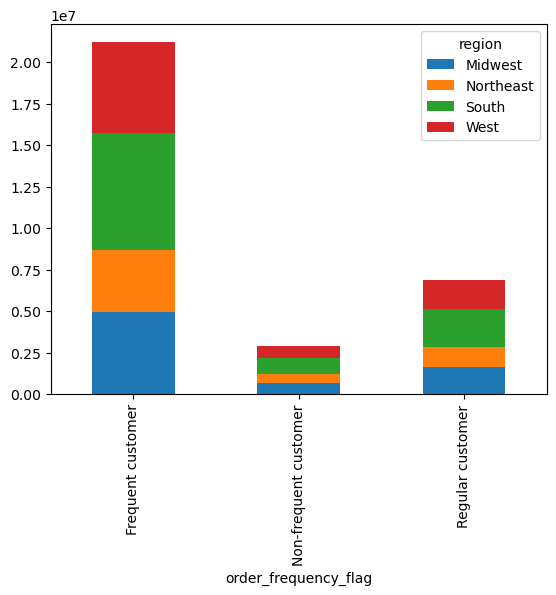

In [54]:
#Create a bar chart
bar5 = crosstab_region_frequency.plot(kind='bar', stacked=True)

In [55]:
#Save the bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frequency_customer.png'))

In [58]:
#Create crosstab of age and family status
crosstab_age_status=pd.crosstab(df_final3['age_grouping'], df_final3['family_status'])

In [59]:
#Check the crosstab
crosstab_age_status

family_status,family with children,single or married without children,single parent with children
age_grouping,,,
Middle-Aged Adult,10838655,3656270,0
Senior,5825113,1905721,0
Young Adult,5079943,2177690,1481172


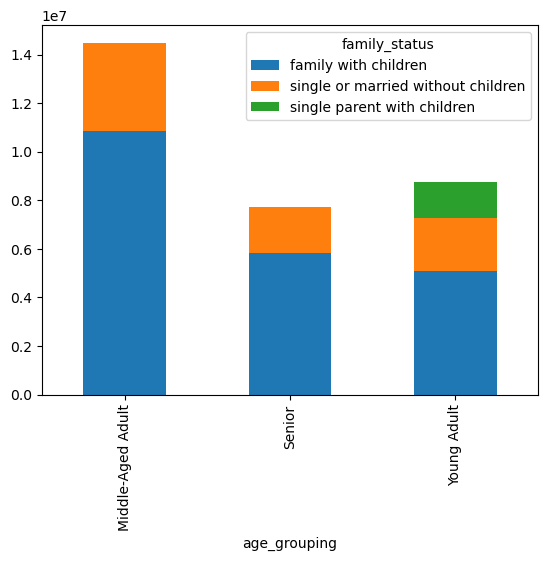

In [60]:
#Create a bar chart
bar5 = crosstab_age_status.plot(kind='bar', stacked=True)

In [62]:
#Save the bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_family_status.png'))

In [65]:
#Create a crosstab of income by region
crosstab_income_region=pd.crosstab(df_final3['region'], df_final3['income_grouping'])

In [66]:
#Check the crosstab
crosstab_income_region

income_grouping,High Income,Low Income,Middle Income
region,,,
Midwest,3400093,783764,3077656
Northeast,2516484,587137,2361064
South,4663571,1142572,4504996
West,3626880,849081,3451266


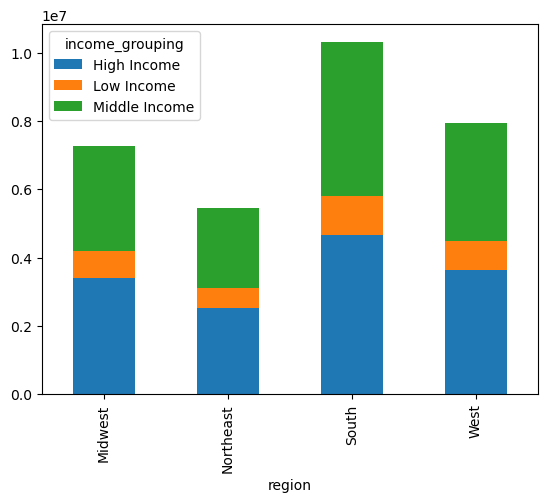

In [67]:
#Create a bar chart
bar6 = crosstab_income_region.plot(kind='bar', stacked=True)

In [68]:
#Save the bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income.png'))

In [73]:
#Create a crosstab of departments and family status groupings
crosstab_family_departmentsn=pd.crosstab(df_final3['department'], df_final3['family_status'])

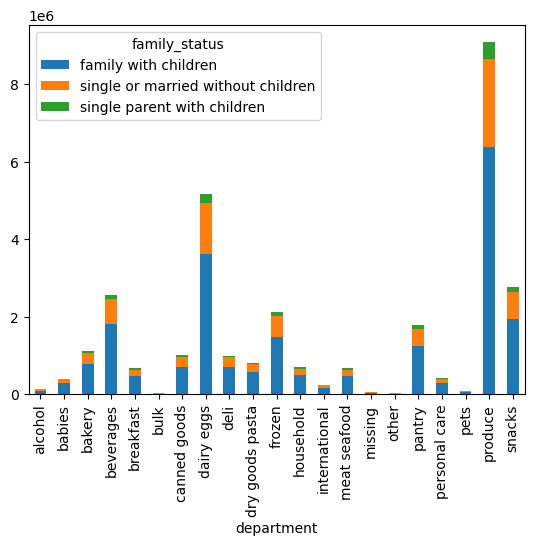

In [74]:
#Create a bar chart
bar7 = crosstab_family_departmentsn.plot(kind='bar', stacked=True)

In [75]:
#Save the bar chart
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_department.png'))

In [76]:
#Create a crosstab of departments and product_price_range
crosstab2 = pd.crosstab(df_final3['department'], df_final3['prod_price_range'])

In [77]:
#Check the crosstab
crosstab2

prod_price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


In [82]:
#Create a crosstab of departments and reorders
crosstab3 = pd.crosstab(df_final3['department'], df_final3['reordered'])

In [83]:
#Check the crosstab
crosstab3

reordered,0,1
department,,
alcohol,59273,85354
babies,167760,242632
bakery,397968,722860
beverages,849889,1722012
breakfast,283530,387320
bulk,13722,19729
canned goods,532527,479547
dairy eggs,1624035,3553147
deli,376955,626879


In [84]:
df_final3.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_grouping,income_grouping,family_status,pet_supply_shopper,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal,Young Adult,Low Income,family with children,Non-Pet Supply Shopper,beverages


In [85]:
#Create a crosstab of order_frequency_flag and loyalty_flag
crosstab4 = pd.crosstab(df_final3['order_frequency_flag'], df_final3['loyalty_flag'])

In [86]:
#Check the crosstab
crosstab4

loyalty_flag,Loyal customer,New customer,Regular customer
order_frequency_flag,,,
Frequent customer,10279960,1293294,9631222
Non-frequent customer,0,1983500,911475
Regular customer,4133,1526901,5334079


In [87]:
#Create a crosstab of spending_flag and loyalty_flag
crosstab5 = pd.crosstab(df_final3['spending_flag'], df_final3['loyalty_flag'])

In [88]:
#Check the crosstab
crosstab5

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,216600,84011,302814
Low spender,10067493,4719684,15573962


In [94]:
#Export the revised dataset
df_final3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_instacart_1.pkl'))